### Vehicle Loan Default Prediction Model 

### 

### Data Cleaning

In [1]:
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc, recall_score, precision_score

In [72]:
df = pd.read_csv('C:/Users/J.C/Desktop/PROJECTS-CHINONSO/Data-Science-Projects/Projects/Loan default/Student Downloads/data/vehicle_loans.csv', index_col='UNIQUEID')

In [73]:
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   DATE_OF_BIRTH                        233154 non-null  object 
 8   EMPLOYMENT_TYPE                      225493 non-null  object 
 9   DISBURSAL_DATE                       233154 non-null  object 
 10  STATE_ID                             233154 non-null  int64  
 11  EMPLOYEE_CODE

In [75]:
df.describe()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [76]:
#convert DISBURSAL_DATE TO DATETIME

df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'], format='mixed')

In [77]:
print("Min Disbursal date: ", df['DISBURSAL_DATE'].min())
print("Max Disbursal date: ", df['DISBURSAL_DATE'].max())

Min Disbursal date:  2018-01-08 00:00:00
Max Disbursal date:  2018-12-10 00:00:00


In [78]:
#our target variable is LOAN_DEFAULT column

In [79]:
df['LOAN_DEFAULT'].value_counts()

LOAN_DEFAULT
0    182543
1     50611
Name: count, dtype: int64

In [80]:
#checking for percentage

df['LOAN_DEFAULT'].value_counts(normalize=True)

LOAN_DEFAULT
0    0.782929
1    0.217071
Name: proportion, dtype: float64

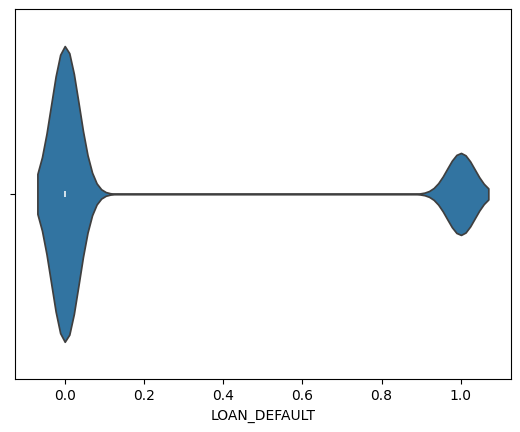

In [81]:
sns.violinplot(x='LOAN_DEFAULT', data=df)
plt.show()


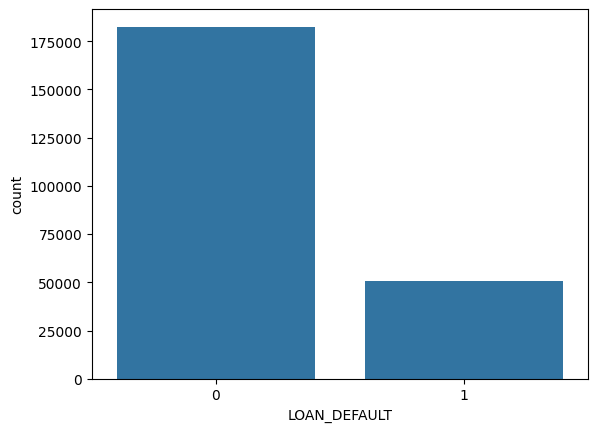

In [82]:
sns.countplot(x='LOAN_DEFAULT', data=df)
plt.show()

### Handling Missing Values

In [83]:
df.isna().sum()


DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

In [84]:
#addressing missing vaues in employement type

df['EMPLOYMENT_TYPE'].value_counts()

EMPLOYMENT_TYPE
Self employed    127635
Salaried          97858
Name: count, dtype: int64

In [85]:
df['EMPLOYMENT_TYPE'].isna().sum()

7661

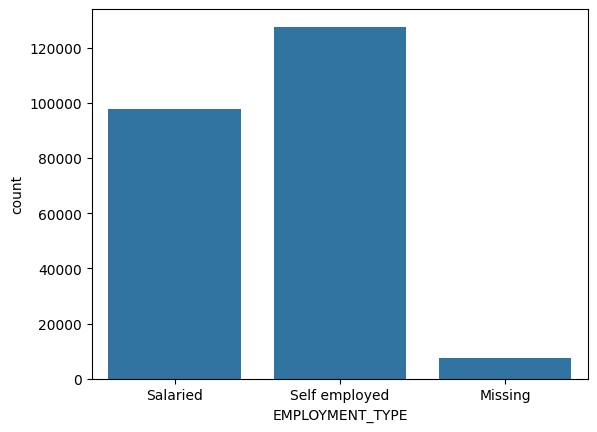

In [86]:
#since we have a large number of missing values we cant drop them. Lets fill them with 'missing'

df = df.fillna(value={'EMPLOYMENT_TYPE' : 'Missing'})
sns.countplot(x='EMPLOYMENT_TYPE', data=df)
plt.show()

In [87]:
df['EMPLOYMENT_TYPE'].isna().sum()

0

### Processing date columns

In [88]:
df[['DISBURSAL_DATE', 'DATE_OF_BIRTH']].sample(10)

,DISBURSAL_DATE,DATE_OF_BIRTH
UNIQUEID,,
581855,2018-10-16,01-11-1989
533863,2018-09-25,10-06-1990
516968,2018-09-19,30-06-1987
562782,2018-08-10,06-04-1994
547380,2018-09-29,01-01-1997
498755,2018-10-09,30-05-1987
496932,2018-08-09,14-06-1986
469336,2018-08-28,04-08-1982
604791,2018-10-23,15-11-1978


In [89]:
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], format='mixed')

In [90]:
print(df['DISBURSAL_DATE'].dtypes)
print(df['DATE_OF_BIRTH'].dtypes)

datetime64[ns]
datetime64[ns]


In [91]:
#TO CALCULATE THE AGE OF THE CUSTOMERS AT TIME OF DISBURSAL

df['AGE'] = df['DISBURSAL_DATE'] - df['DATE_OF_BIRTH']

df['AGE'].head(10)

UNIQUEID
420825   12485 days
537409   12110 days
417566   11825 days
624493    9066 days
539055   14989 days
518279   10268 days
529269   11218 days
510278   10751 days
490213    9672 days
510980   18516 days
Name: AGE, dtype: timedelta64[ns]

In [92]:
# we have the result in days, to convert them to years, WE USE A NUMPY FUNCTION, 'timedelta64'

df['AGE'] = df['AGE'] // np.timedelta64(1, 'Y')

df['AGE'].head(10)

UNIQUEID
420825    34
537409    33
417566    32
624493    24
539055    41
518279    28
529269    30
510278    29
490213    26
510980    50
Name: AGE, dtype: int64

In [93]:
print(df[['DATE_OF_BIRTH', 'AGE', 'DISBURSAL_DATE']].sample(10))

         DATE_OF_BIRTH  AGE DISBURSAL_DATE
UNIQUEID                                  
556655      1992-11-29   25     2018-04-10
441334      1972-06-14   46     2018-08-16
493491      1982-01-03   36     2018-06-09
595825      1997-01-01   21     2018-10-21
534513      1992-04-08   26     2018-09-25
643239      1974-06-30   44     2018-10-30
601092      1992-01-07   26     2018-10-22
575769      1984-09-02   34     2018-10-13
559977      1983-01-01   35     2018-06-10
521686      1984-01-01   34     2018-09-20


In [94]:
#Extracting disbursal months - use -- dt.month

df['DISBURSAL_MONTH'] = df['DISBURSAL_DATE'].dt.month
df['DISBURSAL_MONTH'].value_counts().sort_index()

DISBURSAL_MONTH
1      1708
2        25
3      5148
4      4627
5      2890
6      5991
7      4150
8     56975
9     54443
10    84875
11     6709
12     5613
Name: count, dtype: int64

In [95]:
#dropping the date column
df = df.drop(columns='DISBURSAL_DATE')

In [96]:
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,STATE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,6,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34,3
537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,6,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33,9
417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,6,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32,1
624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,6,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,24,10
539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,6,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,9


### #Formatting the average account age to numeric format 

In [97]:

#defining a function to extract month from a str

def calc_months(str_list): 
    years = int(str_list[0])   #to get the first number in the list which is the year
    months = int(str_list[1])

    num_months = (years * 12) + months

    return num_months

In [98]:
#extracting all instances of a string in the average_act_age column using the regex format - str.findall(\d+)

df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].str.findall('\d+')
print(df['AVERAGE_ACCT_AGE_MONTHS'].sample(10))
df.sample(10)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\J.C\AppData\Local\Temp\ipykernel_9372\531609091.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].str.findall('\d+')


UNIQUEID
535577    [0, 0]
643252    [0, 0]
492494    [0, 0]
640533    [0, 7]
622326    [1, 4]
596098    [1, 3]
492391    [0, 8]
653793    [0, 0]
575681    [0, 6]
646577    [0, 0]
Name: AVERAGE_ACCT_AGE_MONTHS, dtype: object


,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,STATE_ID,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
548300,45349,66530,70.64,20,22882,86,6242,1964-06-14,Self employed,5,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,54,9,"[0, 0]"
431757,58159,78143,76.65,146,21980,86,2959,1999-07-05,Missing,14,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,19,10,"[0, 0]"
607574,64400,73889,89.86,121,21043,86,3670,1966-09-05,Self employed,9,...,0,0,1,2yrs 10mon,3yrs 9mon,0,1,52,10,"[2, 10]"
615928,73817,101696,73.75,48,23698,49,6298,1970-07-08,Self employed,5,...,0,0,0,0yrs 0mon,0yrs 0mon,0,1,48,10,"[0, 0]"
553014,37939,67093,58.13,217,24571,86,7302,1995-01-01,Self employed,7,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,23,9,"[0, 0]"
577552,36438,67320,56.45,10,18471,48,5706,1990-06-07,Self employed,3,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,28,10,"[0, 0]"
577294,43400,61081,73.67,63,17412,45,7084,1974-07-11,Salaried,10,...,0,1,0,2yrs 7mon,4yrs 11mon,0,0,44,10,"[2, 7]"
516201,64042,81038,82.68,152,17981,51,5059,1994-11-20,Salaried,3,...,0,1,0,0yrs 2mon,0yrs 2mon,2,0,23,9,"[0, 2]"
568722,56759,68780,84.33,63,21879,86,7100,1975-01-01,Salaried,10,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,43,11,"[0, 0]"


### mapping the calc_funtion

In [99]:
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE_MONTHS'].map(calc_months)
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,STATE_ID,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,6,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34,3,0
537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,6,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33,9,23
417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,6,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,32,1,0
624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,6,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,24,10,8
539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,6,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,Salaried,6,...,0,0,0,1yrs 9mon,3yrs 3mon,0,0,30,10,21
606141,73651,100600,74.95,34,23775,51,990,1988-05-12,Self employed,6,...,0,0,0,0yrs 6mon,0yrs 6mon,0,0,30,10,6
613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,Salaried,4,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,42,10,0


### we need to do the same for credit history length, we will convert the calc_months function earlier to a reusable fuction

In [100]:
def convert_str_to_months(col_name):
    new_col = col_name + '_MONTHS'
    df[new_col] = df[col_name].str.findall('\d+')
    df[new_col] = df[new_col].map(calc_months)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\J.C\AppData\Local\Temp\ipykernel_9372\3591292355.py:3: SyntaxWarning: invalid escape sequence '\d'
  df[new_col] = df[col_name].str.findall('\d+')


In [101]:
convert_str_to_months('CREDIT_HISTORY_LENGTH')
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,STATE_ID,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,6,...,0,0,0yrs 0mon,0yrs 0mon,0,0,34,3,0,0
537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,6,...,0,1,1yrs 11mon,1yrs 11mon,0,1,33,9,23,23
417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,6,...,0,0,0yrs 0mon,0yrs 0mon,0,0,32,1,0,0
624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,6,...,0,0,0yrs 8mon,1yrs 3mon,1,1,24,10,8,15
539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,6,...,0,0,0yrs 0mon,0yrs 0mon,1,1,41,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,Salaried,6,...,0,0,1yrs 9mon,3yrs 3mon,0,0,30,10,21,39
606141,73651,100600,74.95,34,23775,51,990,1988-05-12,Self employed,6,...,0,0,0yrs 6mon,0yrs 6mon,0,0,30,10,6,6
613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,Salaried,4,...,0,0,0yrs 0mon,0yrs 0mon,0,0,42,10,0,0


#Formatting the PERFORM_CNS_SCORE_DESC Columns

In [102]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [103]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].nunique()

20

In [104]:
df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
DATE_OF_BIRTH                          15433
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURREN

In [2]:
#save data as vehicles_loan_csv

df = pd.read_csv('C:/Users/J.C/Desktop/PROJECTS-CHINONSO/Data-Science-Projects/Projects/Loan default/Student Downloads/data/vehicle_loans_clean.csv', index_col='UNIQUEID')

In [3]:
#visuallizin mobile_no_avl_flag since it has only one unique values

df['MOBILENO_AVL_FLAG'].value_counts()

MOBILENO_AVL_FLAG
1    233154
Name: count, dtype: int64

In [9]:
#Dropping this columns since nothing can be inferred from it

df = df.drop(columns='MOBILENO_AVL_FLAG')
df

KeyError: "['MOBILENO_AVL_FLAG'] not found in axis"

### It appears most of the ID COLUMNS contain so many values that would make the predictive process tough, we will drop this columns in the code below

In [11]:
df = df.drop(columns=['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis=1)

KeyError: "['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'] not found in axis"

In [12]:
df.head(40)

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Unnamed: 36,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,0,0,0,NaN,34,3,0,0,0
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,0,0,1,0,NaN,33,9,23,23,1
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,0,0,0,NaN,32,1,0,0,0
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,0,0,0,1,NaN,24,10,8,15,1
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,0,0,0,1,NaN,41,9,0,0,1
518279,54513,61900,89.66,45,Self employed,6,1,0,0,0,...,0,0,0,0,NaN,28,9,21,24,0
529269,46349,61500,76.42,45,Salaried,6,1,0,0,0,...,0,0,0,0,NaN,30,9,0,0,0
510278,43894,61900,71.89,45,Salaried,6,1,0,0,0,...,0,0,0,0,NaN,29,9,2,2,0
490213,53713,61973,89.56,45,Self employed,6,1,0,0,0,...,0,0,0,1,NaN,26,5,56,56,0


In [13]:
df['MANUFACTURER_ID'].value_counts(normalize=True)

MANUFACTURER_ID
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: proportion, dtype: float64

In [14]:
df.groupby('MANUFACTURER_ID')

In [15]:
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Unnamed: 36,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,0,0,0,NaN,34,3,0,0,0
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,0,0,1,0,NaN,33,9,23,23,1
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,0,0,0,NaN,32,1,0,0,0
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,0,0,0,1,NaN,24,10,8,15,1
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,0,0,0,1,NaN,41,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,48,Salaried,6,0,0,1,0,...,0,0,0,0,NaN,30,10,21,39,0
606141,73651,100600,74.95,51,Self employed,6,0,0,1,0,...,0,0,0,0,NaN,30,10,6,6,0
613658,33484,71212,48.45,86,Salaried,4,1,0,0,0,...,0,0,0,0,NaN,42,10,0,0,0


In [16]:
df.groupby('MANUFACTURER_ID').max().sort_values(by='DISBURSED_AMOUNT', ascending=False)

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,Unnamed: 36,AGE,DISBURSAL_MONTH,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,LOAN_DEFAULT
MANUFACTURER_ID,,,,,,,,,,,,,,,,,,,,,
152,990572,1628992,84.79,Self employed,9,1,1,0,0,0,...,0,3,0,2,NaN,44,10,70,122,0
156,987354,1328954,75.25,Self employed,4,1,0,0,0,0,...,0,2,1,3,NaN,27,10,9,23,0
49,332045,459625,89.95,Self employed,20,1,1,1,1,1,...,289051,12,7,19,NaN,63,12,195,355,1
51,191392,286350,90.00,Self employed,22,1,1,1,1,1,...,1589946,21,7,19,NaN,69,12,185,468,1
67,190887,260715,89.99,Self employed,21,1,1,1,1,1,...,239822,13,5,8,NaN,63,12,214,239,1
48,167447,219140,85.00,Self employed,20,1,1,1,1,1,...,4170901,20,7,13,NaN,63,12,192,306,1
86,166972,237534,95.00,Self employed,22,1,1,1,1,1,...,3246710,28,20,36,NaN,64,12,369,449,1
120,117227,150113,90.00,Self employed,21,1,1,1,1,1,...,430379,17,12,11,NaN,63,12,182,306,1
45,105768,123865,95.00,Self employed,22,1,1,1,1,1,...,1814000,35,11,23,NaN,64,12,197,423,1


In [17]:
#To pivot this groupby code on the target variable 'loan default' we use unstack

df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts().unstack(level=-1)


LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,43687.0,12939.0
48,12156.0,4554.0
49,7984.0,2236.0
51,21547.0,5657.0
67,1882.0,523.0
86,87124.0,22410.0
120,7526.0,2132.0
145,622.0,156.0
152,6.0,NaN


In [18]:
# df.iloc[:, -1:]

In [19]:
df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT,0,1
MANUFACTURER_ID,,
45,0.771501,0.228499
48,0.727469,0.272531
49,0.781213,0.218787
51,0.792053,0.207947
67,0.782536,0.217464
86,0.795406,0.204594
120,0.779250,0.220750
145,0.799486,0.200514
152,1.000000,NaN


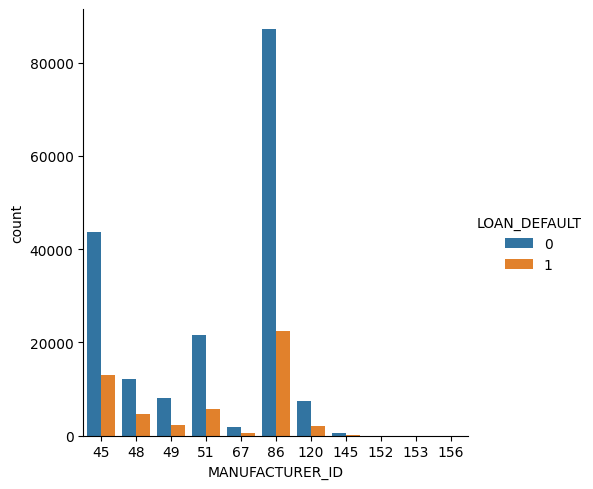

In [20]:
#visualizing in catplot

sns.catplot(data=df, kind='count', x='MANUFACTURER_ID', hue='LOAN_DEFAULT')
plt.show()

In [21]:
#function to automate categorical column analysis

def describe_categorical(col_name):

    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio Counts".format(col_name))
    print(df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    sns.catplot(data=df, kind='count', x=col_name, hue='LOAN_DEFAULT')
    plt.show()

DISBURSAL_MONTH Summary


DISBURSAL_MONTH Counts
DISBURSAL_MONTH
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: count, dtype: int64


DISBURSAL_MONTH Ratio
DISBURSAL_MONTH
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: proportion, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
1                 1316    392
2                   23      2
3                 4094   1054
4                 3636    991
5                 2279    611
6                 4697   1294
7                 3222    928
8                44938  12037
9                43910  10533
10               64474  20401
11                5484   1225
12                4470   1143


DISBURSAL_MONTH Default Ratio Counts
LOAN_DEFAULT        

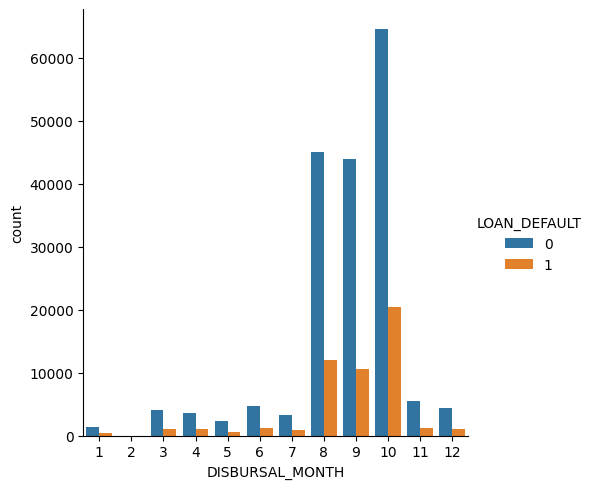

In [22]:
describe_categorical("DISBURSAL_MONTH")

### Exploring Continuous variables

In [23]:
df['AGE'].describe()

count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64

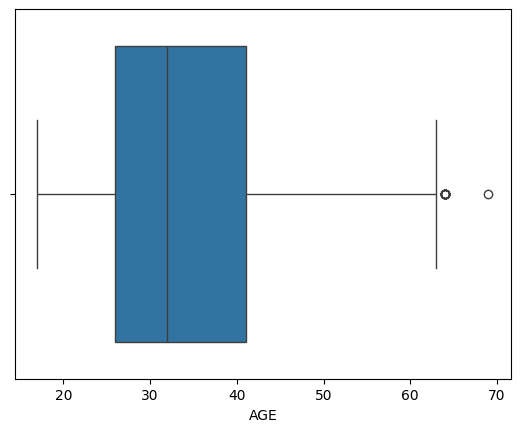

In [24]:
sns.boxplot( x="AGE",data=df,)
plt.show()

C:\Users\J.C\AppData\Local\Temp\ipykernel_3020\3762266651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], hist=False)


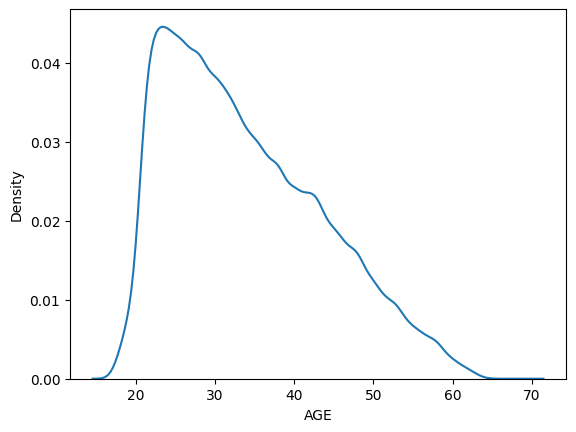

In [25]:
sns.distplot(df['AGE'], hist=False)
plt.show()

In [26]:
#Grouping by age

df.groupby('LOAN_DEFAULT')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
LOAN_DEFAULT,,,,,,,,
0,182543.0,34.090713,9.860825,17.0,26.0,32.0,41.0,69.0
1,50611.0,33.225366,9.685441,17.0,25.0,31.0,40.0,64.0


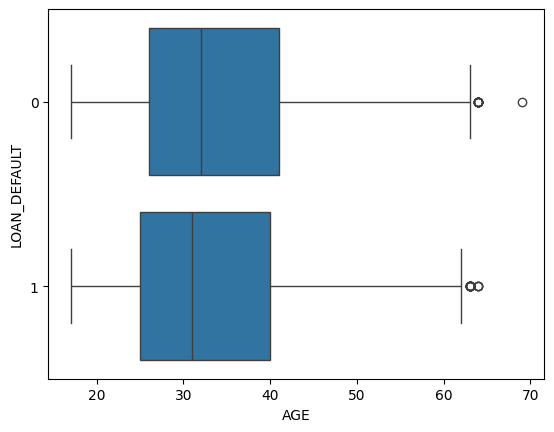

In [27]:
sns.boxplot(x='AGE', y='LOAN_DEFAULT', data=df, orient='h')
plt.show()

### Explore continuous variables

In [28]:
def describe_continuous(col_name):
    print("{0} Summary".format(col_name))
    print(df[col_name].describe())
    print("\n")

    #boxplot
    sns.boxplot(x=col_name, data=df)
    plt.show()

    sns.distplot(df[col_name], hist=False)
    plt.show()

    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(df.groupby('LOAN_DEFAULT')[col_name].describe())

    #grouped boxplot
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=df, orient='h')
    plt.show()

DISBURSED_AMOUNT Summary
count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




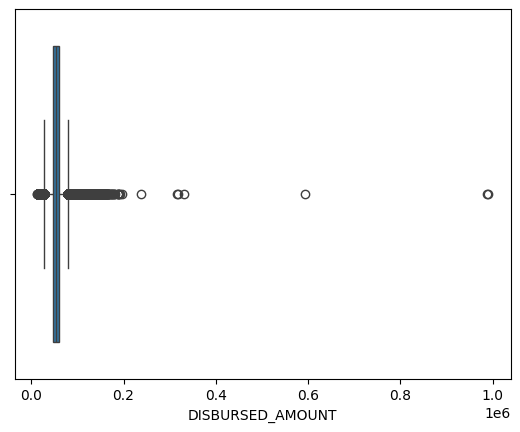

C:\Users\J.C\AppData\Local\Temp\ipykernel_3020\4230768102.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], hist=False)


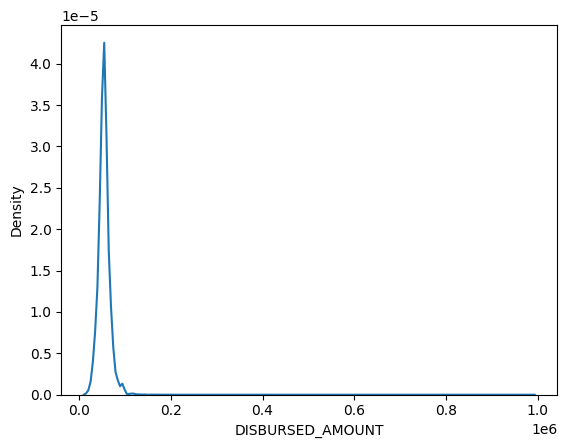

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


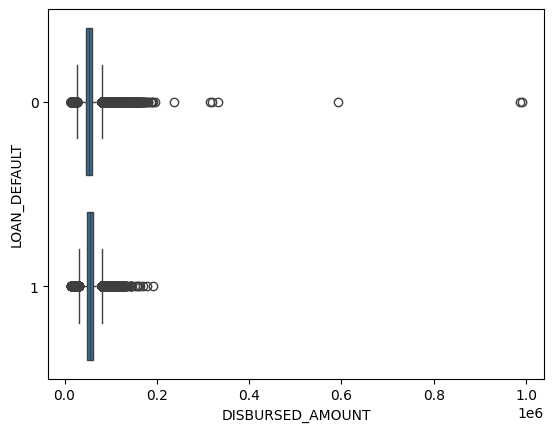

In [29]:
describe_continuous('DISBURSED_AMOUNT')

AADHAR_FLAG Summary


AADHAR_FLAG Counts
AADHAR_FLAG
1    195924
0     37230
Name: count, dtype: int64


AADHAR_FLAG Ratio
AADHAR_FLAG
1    0.84032
0    0.15968
Name: proportion, dtype: float64


AADHAR_FLAG Default Counts
LOAN_DEFAULT       0      1
AADHAR_FLAG                
0              27684   9546
1             154859  41065


AADHAR_FLAG Default Ratio Counts
LOAN_DEFAULT       0      1
AADHAR_FLAG                
0              27684   9546
1             154859  41065




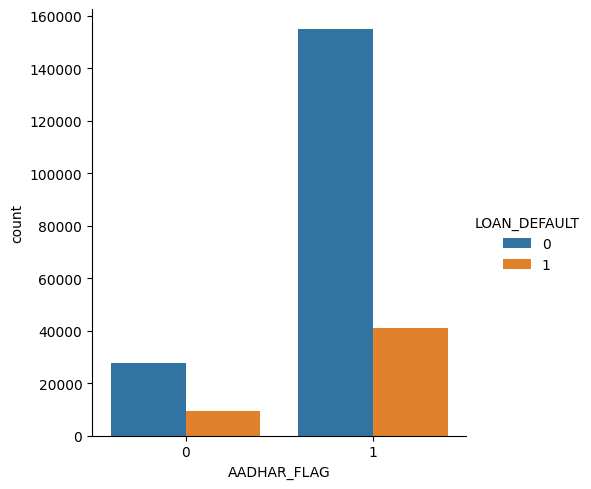

In [30]:
describe_categorical('AADHAR_FLAG')

### Customers with AADHAR_FLAG AS 1 WERE MOST LIKELY NOT TO DEFAULT

### The highest amount in DISBURSED_AMOUNT COLUMN SEEMS TO BE A BIT LARGE, WE NEED TO INVESTISGATE TO KNOW WHY

In [31]:
#USING idxmax to locate the row index of that column

df['DISBURSED_AMOUNT'].idxmax()

440173

In [32]:
df.loc[df['DISBURSED_AMOUNT'].idxmax()]

DISBURSED_AMOUNT                                                                  990572
ASSET_COST                                                                       1628992
LTV                                                                                61.39
MANUFACTURER_ID                                                                      152
EMPLOYMENT_TYPE                                                                  Missing
STATE_ID                                                                               9
AADHAR_FLAG                                                                            1
PAN_FLAG                                                                               1
VOTERID_FLAG                                                                           0
DRIVING_FLAG                                                                           0
PASSPORT_FLAG                                                                          0
PERFORM_CNS_SCORE    

In [33]:
#to address the large or outlier vaues we create bins

disbursed_bins = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_labels = ['13k - 30k', '30k - 45k','45k - 60k', '60k - 75k', '75k - 150k', '150k - 1m']

### We now use pandas function pd.cut to create these labels

In [34]:
df['DISBURSED_CATS'] = pd.cut(df['DISBURSED_AMOUNT'], disbursed_bins, labels=disbursed_labels)

DISBURSED_CATS Summary


DISBURSED_CATS Counts
DISBURSED_CATS
45k - 60k     126904
60k - 75k      49824
30k - 45k      40626
75k - 150k     10871
13k - 30k       4865
150k - 1m         64
Name: count, dtype: int64


DISBURSED_CATS Ratio
DISBURSED_CATS
45k - 60k     0.544293
60k - 75k     0.213696
30k - 45k     0.174245
75k - 150k    0.046626
13k - 30k     0.020866
150k - 1m     0.000274
Name: proportion, dtype: float64


DISBURSED_CATS Default Counts
LOAN_DEFAULT        0      1
DISBURSED_CATS              
13k - 30k        4207    658
30k - 45k       34323   6303
45k - 60k       98830  28074
60k - 75k       37056  12768
75k - 150k       8070   2801
150k - 1m          57      7


DISBURSED_CATS Default Ratio Counts
LOAN_DEFAULT        0      1
DISBURSED_CATS              
13k - 30k        4207    658
30k - 45k       34323   6303
45k - 60k       98830  28074
60k - 75k       37056  12768
75k - 150k       8070   2801
150k - 1m          57      7




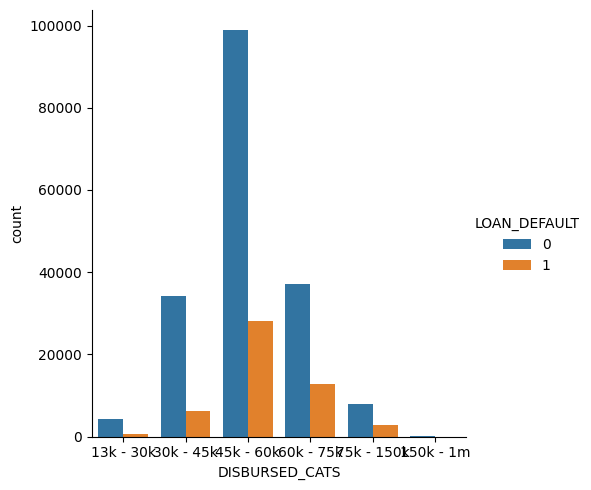

In [35]:
describe_categorical('DISBURSED_CATS')


### Calculating disbursal Difference

In [36]:
df['DISBURSAL_DIFFERENCE'] = df['ASSET_COST'] - df['DISBURSED_AMOUNT']

In [37]:
df[['DISBURSAL_DIFFERENCE', 'ASSET_COST', 'DISBURSED_AMOUNT']].sample(10)

,DISBURSAL_DIFFERENCE,ASSET_COST,DISBURSED_AMOUNT
UNIQUEID,,,
553619,13133,78015,64882
616874,24007,62846,38839
629608,11362,69167,57805
577885,29145,104396,75251
508888,13513,74146,60633
637727,10298,77867,67569
436376,40398,71382,30984
475164,11741,69000,57259
491314,10207,71654,61447


### Combining existing accts for each customer: Primary and Secondary
Primary Accts indicate loans taken directly by the customer, secondary accts are loans the customer was a co-appliacnt or guarantor

In [38]:
df['TOTAL_ACCTS'] = df['PRI_NO_OF_ACCTS'] + df['SEC_NO_OF_ACCTS']
df['TOTAL_ACTIVE_ACCTS'] = df['PRI_ACTIVE_ACCTS'] + df['SEC_ACTIVE_ACCTS']
df['TOTAL_OVERDUE_ACCTS'] = df['PRI_OVERDUE_ACCTS'] + df['SEC_OVERDUE_ACCTS']
df['TOTAL_CURRENT_BALANCE'] = df['PRI_CURRENT_BALANCE'] + df['SEC_CURRENT_BALANCE']
df['TOTAL_SANCTIONED_AMOUNT'] = df['PRI_SANCTIONED_AMOUNT'] + df['SEC_SANCTIONED_AMOUNT'] 
df['TOTAL_DISBURSED_AMOUNT'] = df['PRI_DISBURSED_AMOUNT'] + df['SEC_DISBURSED_AMOUNT']
df['TOTAL_INSTAL_AMT'] = df['PRIMARY_INSTAL_AMT'] + df['SEC_INSTAL_AMT']

In [39]:
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,LOAN_DEFAULT,DISBURSED_CATS,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,TOTAL_ACTIVE_ACCTS,TOTAL_OVERDUE_ACCTS,TOTAL_CURRENT_BALANCE,TOTAL_SANCTIONED_AMOUNT,TOTAL_DISBURSED_AMOUNT,TOTAL_INSTAL_AMT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,45k - 60k,7822,0,0,0,0,0,0,0
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,1,45k - 60k,18405,1,1,1,27600,50200,50200,1991
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,45k - 60k,8082,0,0,0,0,0,0,0
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,1,45k - 60k,8600,3,0,0,0,0,0,31
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,1,45k - 60k,7922,0,0,0,0,0,0,0


In [40]:
#dropping the previous columns
drop_cols = ['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']

df = df.drop(drop_cols, axis=1)

In [41]:
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,LOAN_DEFAULT,DISBURSED_CATS,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,TOTAL_ACTIVE_ACCTS,TOTAL_OVERDUE_ACCTS,TOTAL_CURRENT_BALANCE,TOTAL_SANCTIONED_AMOUNT,TOTAL_DISBURSED_AMOUNT,TOTAL_INSTAL_AMT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,Salaried,6,1,0,0,0,...,0,45k - 60k,7822,0,0,0,0,0,0,0
537409,47145,65550,73.23,45,Self employed,6,1,0,0,0,...,1,45k - 60k,18405,1,1,1,27600,50200,50200,1991
417566,53278,61360,89.63,45,Self employed,6,1,0,0,0,...,0,45k - 60k,8082,0,0,0,0,0,0,0
624493,57513,66113,88.48,45,Self employed,6,1,0,0,0,...,1,45k - 60k,8600,3,0,0,0,0,0,31
539055,52378,60300,88.39,45,Self employed,6,1,0,0,0,...,1,45k - 60k,7922,0,0,0,0,0,0,0


### Calculating percentabe of overdue accouuts 

In [42]:
df['OVERDUE_PCT'] = df['TOTAL_OVERDUE_ACCTS'] / df['TOTAL_ACCTS']

In [43]:
df['OVERDUE_PCT']

UNIQUEID
420825    NaN
537409    1.0
417566    NaN
624493    0.0
539055    NaN
         ... 
626432    0.0
606141    0.0
613658    NaN
548084    NaN
630213    NaN
Name: OVERDUE_PCT, Length: 233154, dtype: float64

In [44]:
df['OVERDUE_PCT'].isna().sum()

115792

In [45]:
df['OVERDUE_PCT'] = df['OVERDUE_PCT'].fillna(0)

### Dealing with outliers
We shall use Sklearns scaling library - MIN MAX SCALER TO TRANSFORM SOME NUMERIC VALUES TO EVEL SCALE


In [46]:
#list of al columns 

numeric_cols = ['DISBURSED_AMOUNT', 
                'ASSET_COST', 
                'LTV', 
                'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
                'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                'NO_OF_INQUIRIES', 
                'AGE', 
                'AVERAGE_ACCT_AGE_MONTHS', 
                'CREDIT_HISTORY_LENGTH_MONTHS',
                'PERFORM_CNS_SCORE',
                'TOTAL_ACCTS',
                'TOTAL_ACTIVE_ACCTS',
                'TOTAL_OVERDUE_ACCTS',
                'TOTAL_CURRENT_BALANCE', 
                'TOTAL_SANCTIONED_AMOUNT', 
                'TOTAL_DISBURSED_AMOUNT', 
                'TOTAL_INSTAL_AMT', 
                'OVERDUE_PCT', 
                'DISBURSAL_DIFFERENCE']

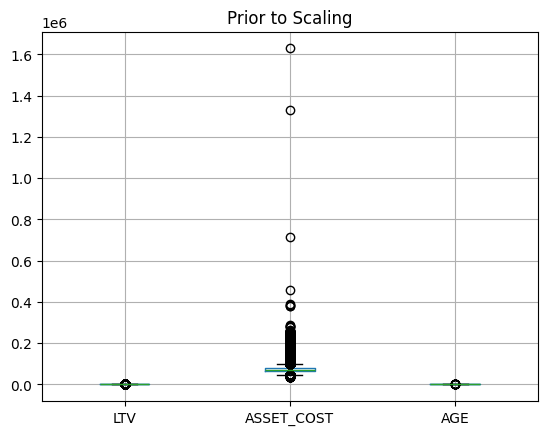

In [47]:
df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('Prior to Scaling')
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [49]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


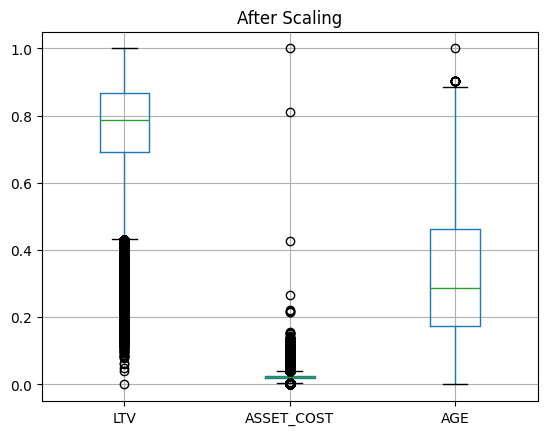

In [50]:
df[['LTV', 'ASSET_COST', 'AGE']].boxplot()
plt.title('After Scaling')
plt.show()

### All the data are now sampled between 1 and 0

### 

### Building a Linear Classification model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 
Since we have some categorical values in our dataset, we need to encode them for easy understanding by the machine learning model

In [52]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CATS', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']

df[category_cols].dtypes

MANUFACTURER_ID                     int64
STATE_ID                            int64
DISBURSAL_MONTH                     int64
DISBURSED_CATS                   category
PERFORM_CNS_SCORE_DESCRIPTION      object
EMPLOYMENT_TYPE                    object
dtype: object

### 

We would rather have the following columns above to be in categorical form and not as int64

In [53]:
df[category_cols] = df[category_cols].astype('category')
df[category_cols].dtypes

MANUFACTURER_ID                  category
STATE_ID                         category
DISBURSAL_MONTH                  category
DISBURSED_CATS                   category
PERFORM_CNS_SCORE_DESCRIPTION    category
EMPLOYMENT_TYPE                  category
dtype: object

In [54]:
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MANUFACTURER_ID,EMPLOYMENT_TYPE,STATE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,...,DISBURSED_CATS,DISBURSAL_DIFFERENCE,TOTAL_ACCTS,TOTAL_ACTIVE_ACCTS,TOTAL_OVERDUE_ACCTS,TOTAL_CURRENT_BALANCE,TOTAL_SANCTIONED_AMOUNT,TOTAL_DISBURSED_AMOUNT,TOTAL_INSTAL_AMT,OVERDUE_PCT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,0.038125,0.013442,0.935860,45,Salaried,6,1,0,0,0,...,45k - 60k,0.006029,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.0
537409,0.034612,0.017934,0.743792,45,Self employed,6,1,0,0,0,...,45k - 60k,0.022710,0.002208,0.006944,0.04,0.064978,0.00005,0.00005,0.000078,1.0
417566,0.040888,0.015302,0.936801,45,Self employed,6,1,0,0,0,...,45k - 60k,0.006439,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.0
624493,0.045222,0.018287,0.923267,45,Self employed,6,1,0,0,0,...,45k - 60k,0.007255,0.006623,0.000000,0.00,0.064710,0.00000,0.00000,0.000001,0.0
539055,0.039967,0.014636,0.922208,45,Self employed,6,1,0,0,0,...,45k - 60k,0.006187,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.000000,0.0


In [55]:
#using the popular pd.get_dummies to transform our categorical columns to categorical labels

In [56]:
# fig, ax = plt.subplots(figsize=(20,15))
# copy = df.drop(columns=['EMPLOYMENT_TYPE']).copy()
# corr = copy.corr()
# sns.heatmap(corr, cmap='Blues', annot=True)
# plt.show()

In [82]:
#we shall select a few columns which may appear to have considerable effects on the target variable and train on them

train_cols = small_cols = ['STATE_ID', 'LTV', 'DISBURSED_CATS', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT']

df_train_cols = df[train_cols]

train_df = pd.get_dummies(df_train_cols, prefix_sep='-', drop_first=True) #use drop_first o ignorethe column names


In [83]:
X = train_df.drop(['LOAN_DEFAULT'], axis=1)
y = train_df['LOAN_DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.4, random_state=42)

logistic_reg = LogisticRegression(max_iter=200) #use max_iter to give enough iterations for the linear model to learn the data

logistic_reg.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [84]:
#To get the score 

logistic_reg.score(X_test, y_test)

0.7832128841328729

### Evaluation of the model using metrics

    Evaluation of model performance on predictions

In [85]:
yhat = logistic_reg.predict(X_test)
yhat[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [86]:
#evaluating with confusion matrix 

confusion_mat = confusion_matrix(y_test, yhat)
confusion_mat

array([[73041,     3],
       [20215,     3]], dtype=int64)

In [87]:
#extracting details of confusionmat

tn = confusion_mat[0][0]
fp = confusion_mat[0][1]
fn = confusion_mat[1][0]
tp = confusion_mat[1][1]

In [88]:
print("True Negatives (Correct Non-Defaults): ", tn)
print("False Positives (Incorrect Defaults): ", fp)
print("False Negatives (Incorrect Non-Defaults): ", fn)
print("True Positives (Correct Defaults)", tp)

True Negatives (Correct Non-Defaults):  73041
False Positives (Incorrect Defaults):  3
False Negatives (Incorrect Non-Defaults):  20215
True Positives (Correct Defaults) 3


### our model seems to be accurately predicting a large number of non-defaulsts, but since we need to predict defaulters
#we find this model wanting also because it inaccurately predicsts a large number of non-defaults

### Testing other performance evaluation metrics

In [89]:
precision = precision_score(y_test, yhat)
precision

0.5

In [90]:
recall  = recall_score(y_test, yhat)
recall

0.0001483826293401919

### This recall and f1 values prove that the model is not performing well  on the default prediction

In [91]:
f1 = f1_score(y_test, yhat)
f1

0.0002966772151898734

### 
Defining a function to plot roc_curve

In [92]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title("ROC")
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [93]:
probs = logistic_reg.predict_proba(X_test)
probs

array([[0.71510834, 0.28489166],
       [0.81730928, 0.18269072],
       [0.78811733, 0.21188267],
       ...,
       [0.70606379, 0.29393621],
       [0.70558201, 0.29441799],
       [0.85019013, 0.14980987]])

In [94]:
probs.shape

(93262, 2)

In [95]:
print(probs[:, 0])

[0.71510834 0.81730928 0.78811733 ... 0.70606379 0.70558201 0.85019013]


In [96]:
probs_df = pd.DataFrame()
probs_df['prob_0'] = probs[:, 0]
probs_df['prob_1'] = probs[:, 1]

probs_df.describe()

,prob_0,prob_1
count,93262.000000,93262.000000
mean,0.783235,0.216765
std,0.067328,0.067328
min,0.481160,0.036189
25%,0.740209,0.169721
50%,0.786777,0.213223
75%,0.830279,0.259791
max,0.963811,0.518840


In [66]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)

In [67]:
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)  

AUC:  0.6129633580956242


### 
A good classifier makes an auc of 0.5, above is bad

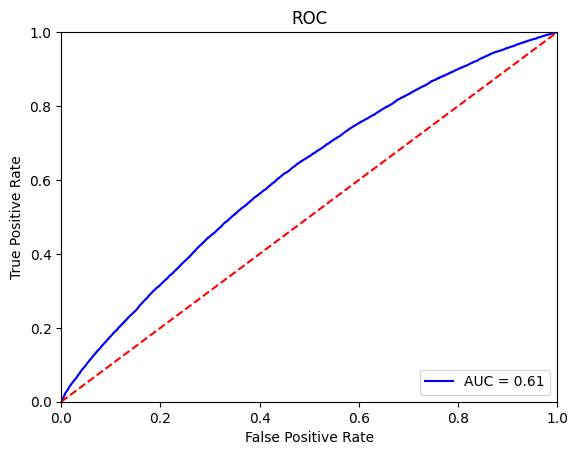

In [68]:
plot_roc_curve(fpr, tpr, roc_auc)

In [69]:
#creating a dataframe to visualize distribution of the predcition

df_results = pd.DataFrame()
df_results['true_class'] = y_test
df_results['predicted_class'] = list(yhat)
df_results['default_prob'] = probs[:, 1]

In [70]:
# groupby predicted class

df_results.groupby('true_class')['predicted_class'].value_counts(normalize=True)

true_class  predicted_class
0           0                  0.999959
            1                  0.000041
1           0                  0.999852
            1                  0.000148
Name: proportion, dtype: float64

###

It appears most of our predictions for non default loans were classifeid as 0s

 We can plot the distribution of predicted default probability fo rall true defaulted loans 

In [71]:
default_probs_t = df_results[df_results['true_class'] == 0]['default_prob']

In [72]:
default_probs_f = df_results[df_results['true_class'] == 1]['default_prob']

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\2366346880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)


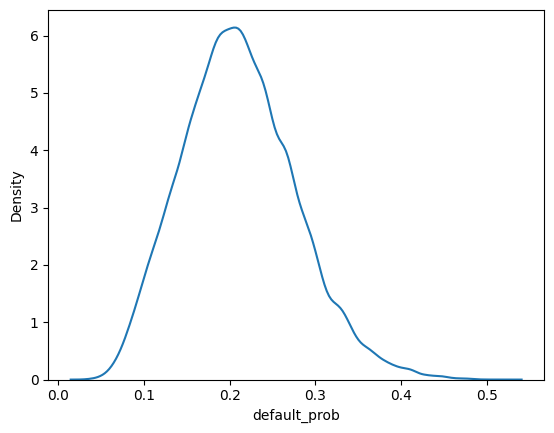

In [73]:
sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
plt.show()

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1118650952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 1]['default_prob'], label='Default', hist=False)


<Axes: xlabel='default_prob', ylabel='Density'>

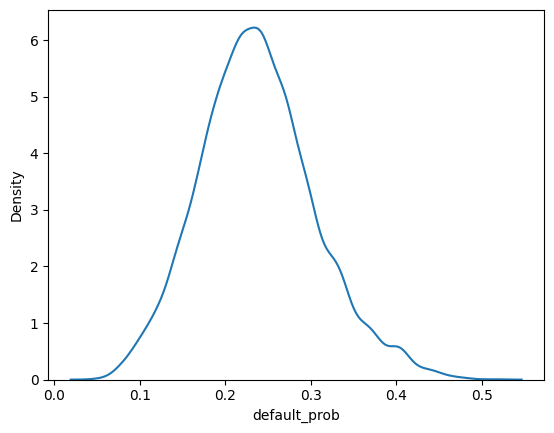

In [74]:
sns.distplot( df_results[df_results['true_class'] == 1]['default_prob'], label='Default', hist=False)


### Building a Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
#combining the model evaluation into a function

def eval_model(model, X_test, y_test):
    yhat = model.predict(X_test)
    prob = model.predict_proba(X_test)

    conf_mat = confusion_matrix(y_test, yhat)
    accuracy = accuracy_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    f1 = f1_score(y_test, yhat)

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("f1: ", f1)

    fpr, tpr, threshold = roc_curve(y_test, probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    df_results = pd.DataFrame()
    df_results['true_class'] = y_test
    df_results['predicted_class'] = list(yhat)
    df_results['default_prob'] = probs[:, 1]

    sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
    sns.distplot( df_results[df_results['true_class'] == 1]['default_prob'], label='Default', hist=False)
    plt.title("Probability Distribution for Predicted Classes")
    plt.legend(loc='best')
    plt.show()

    print(df_results.groupby('true_class')['predicted_class'].value_counts(normalize=True))

In [98]:
 #creating a reusable funtion for splitting dataset 

def encode_split(df):
    df_encode = pd.get_dummies(df, prefix_sep= '_', drop_first=True)

    X = df_encode.drop(columns=['LOAN_DEFAULT'], axis=1)
    y = df_encode['LOAN_DEFAULT']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test



Accuracy:  0.7125731809311402
Precision:  0.26247476204211134
Recall:  0.18003759026609953
f1:  0.2135774218154081
AUC:  0.6129633580956242


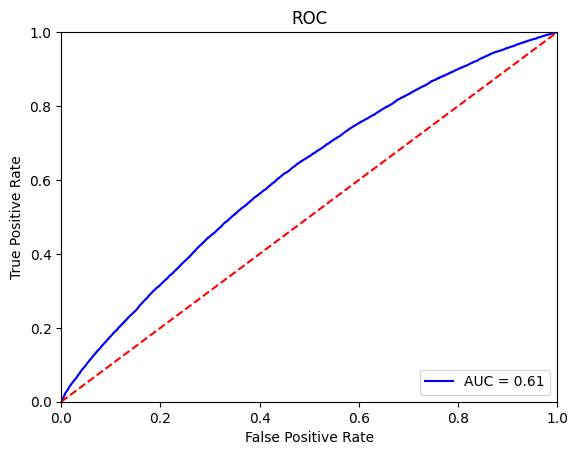

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

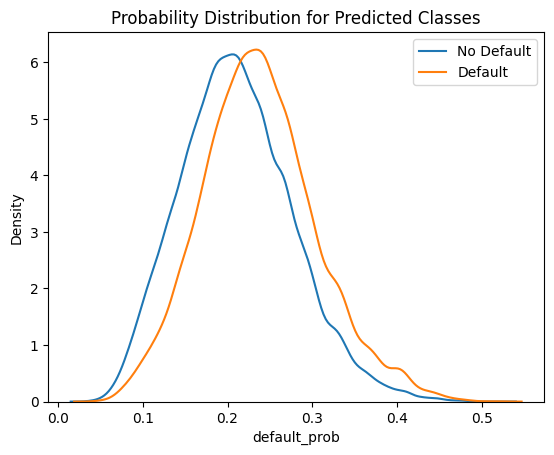

true_class  predicted_class
0           0                  0.859975
            1                  0.140025
1           0                  0.819962
            1                  0.180038
Name: proportion, dtype: float64


In [91]:
# We will forge ahead to create the RDf classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

eval_model(rf, X_test, y_test)



Accuracy:  0.7829448221140443
Precision:  0.4570446735395189
Recall:  0.006578296567415175
f1:  0.012969915646789214
AUC:  0.6129633580956242


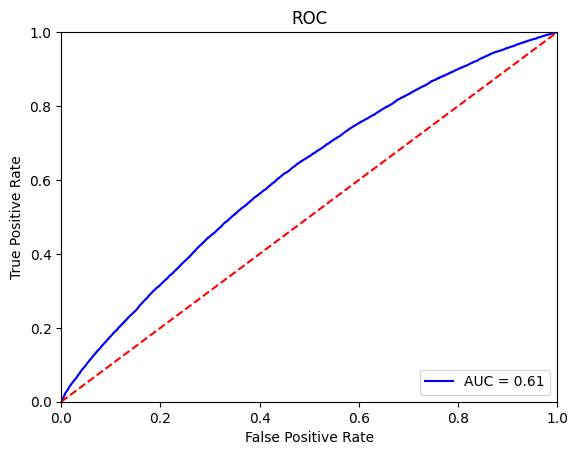

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

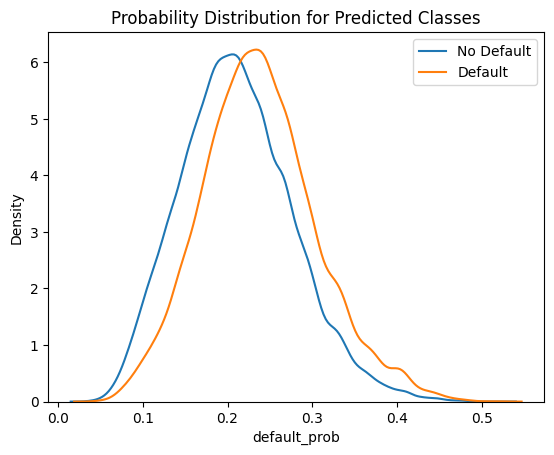

true_class  predicted_class
0           0                  0.997837
            1                  0.002163
1           0                  0.993422
            1                  0.006578
Name: proportion, dtype: float64


In [94]:
#The model seems to be performing better but not really well, tuning a few hyperparameters
#using n_estimators of range 1-300 and max_depth of 15
rf = RandomForestClassifier(n_estimators=300, max_depth=15)
rf.fit(X_train, y_train)

eval_model(rf, X_test, y_test)

### 

The model is still having issues classifying defaults, this is due to an imbalance in the distribution of classes in the data fed to the model. 

We will try to balance the class in the following lines of code



Accuracy:  0.6129077223306384
Precision:  0.28835647469552006
Recall:  0.5351666831536255
f1:  0.3747770215271644
AUC:  0.6129633580956242


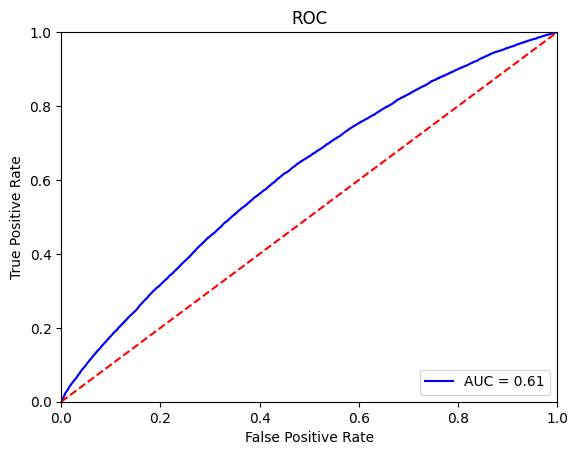

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

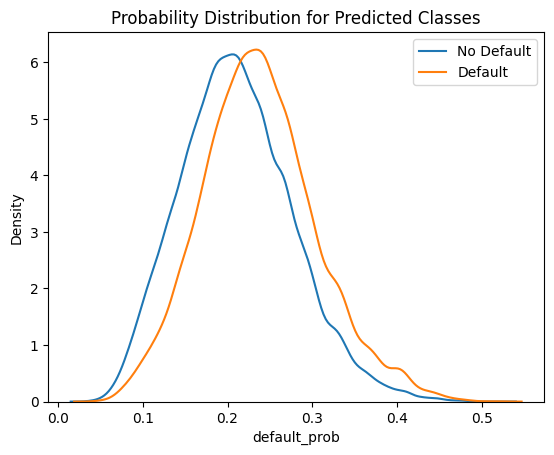

true_class  predicted_class
0           0                  0.634426
            1                  0.365574
1           1                  0.535167
            0                  0.464833
Name: proportion, dtype: float64


In [96]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')

rf.fit(X_train, y_train)
eval_model(rf, X_test, y_test)

### 
We are beginning to see balancing in the predicitons, defaults are being predicted with probability distributino of 53%

Althought precision and accuracy have fallen, there is some increase in f1, auc and recal

### Trying to manually balance the class using weights



Accuracy:  0.7124659561236087
Precision:  0.3178555653710247
Recall:  0.28474626570382827
f1:  0.3003913383772502
AUC:  0.6129633580956242


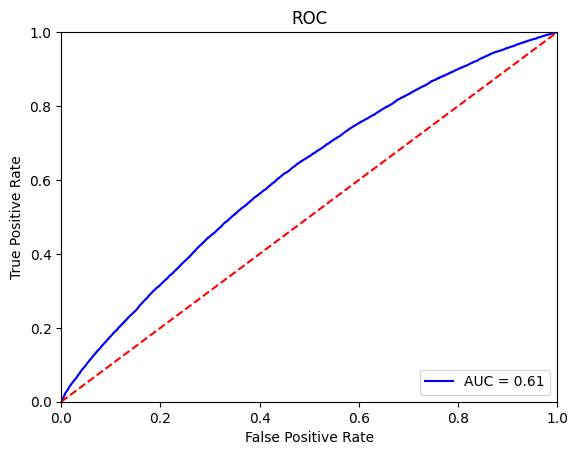

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

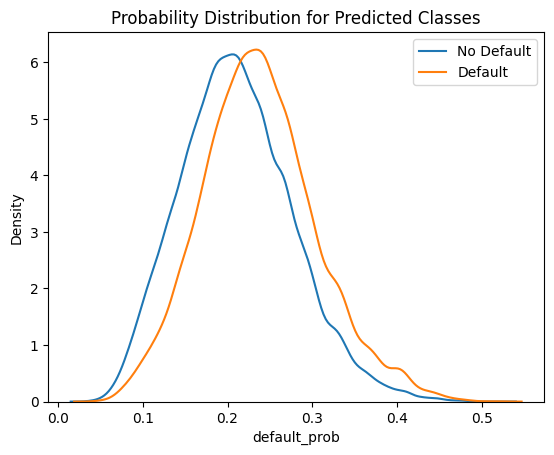

true_class  predicted_class
0           0                  0.830855
            1                  0.169145
1           0                  0.715254
            1                  0.284746
Name: proportion, dtype: float64


In [98]:
weights = {0:0.27, 1:0.73}

rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight=weights)

rf.fit(X_train, y_train)
eval_model(rf, X_test, y_test)

### 
We have gotten some better classifications, increasin precision and accuracy but recall and f1 have reduced.

### We can use Resampling models like upsampling, Downsampling and SMOTE(Synthetic Minority Oversampling)


Resampling is properly done only on training data, hence we combine X_train and y_train

In [99]:
train_df = X_train.copy()
train_df['LOAN_DEFAULT'] = y_train

print(train_df['LOAN_DEFAULT'].value_counts())
print(train_df['LOAN_DEFAULT'].value_counts(normalize=True))

LOAN_DEFAULT
0    109499
1     30393
Name: count, dtype: int64
LOAN_DEFAULT
0    0.78274
1    0.21726
Name: proportion, dtype: float64


In [104]:
#We see that default(1) appears as the minority
#we will creat a subset for this

train_minority = train_df[train_df['LOAN_DEFAULT']==1]
train_majority = train_df[train_df['LOAN_DEFAULT']==0]


In [105]:
train_minority

,LTV,PERFORM_CNS_SCORE,STATE_ID-2,STATE_ID-3,STATE_ID-4,STATE_ID-5,STATE_ID-6,STATE_ID-7,STATE_ID-8,STATE_ID-9,...,DISBURSAL_MONTH-4,DISBURSAL_MONTH-5,DISBURSAL_MONTH-6,DISBURSAL_MONTH-7,DISBURSAL_MONTH-8,DISBURSAL_MONTH-9,DISBURSAL_MONTH-10,DISBURSAL_MONTH-11,DISBURSAL_MONTH-12,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
598661,0.603625,0.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
640883,0.764505,0.550562,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
502820,0.694716,0.456180,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
547191,0.750265,0.000000,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
513329,0.928092,0.000000,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548245,0.747676,0.483146,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
586425,0.813111,0.000000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,1
441420,0.926092,0.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1


###

sklearn provides us with the resample function

we pass it 4 parameters

    the dataframe which we want to resample
    replace: boolean indicating that we want to resample with replacement
    n_samples: the number of samples to be created
    random_state: random seed for repeatability

In [106]:
train_majority.shape

(109499, 40)

### 
We wish to resample to compensate for the amount of rows in the majority class

In [109]:
train_minority_fill = sklearn.utils.resample(train_minority, replace=True, n_samples=train_majority.shape[0], random_state=123)

In [113]:
train_minority_fill

,LTV,PERFORM_CNS_SCORE,STATE_ID-2,STATE_ID-3,STATE_ID-4,STATE_ID-5,STATE_ID-6,STATE_ID-7,STATE_ID-8,STATE_ID-9,...,DISBURSAL_MONTH-4,DISBURSAL_MONTH-5,DISBURSAL_MONTH-6,DISBURSAL_MONTH-7,DISBURSAL_MONTH-8,DISBURSAL_MONTH-9,DISBURSAL_MONTH-10,DISBURSAL_MONTH-11,DISBURSAL_MONTH-12,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
466243,0.668707,0.795506,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,1
538917,0.940685,0.926966,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1
636889,0.631282,0.000000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,1
475093,0.641991,0.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
572021,0.932682,0.829213,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560772,0.882311,0.000000,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,1
496676,0.820996,0.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
641908,0.774626,0.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1


In [110]:
# train_majority and train_minority_fill should have same number or rows not

print(train_minority_fill['LOAN_DEFAULT'].value_counts())
print(train_majority['LOAN_DEFAULT'].value_counts())

LOAN_DEFAULT
1    109499
Name: count, dtype: int64
LOAN_DEFAULT
0    109499
Name: count, dtype: int64


In [112]:
#joining the two dataframes using concat

train_balanced = pd.concat([train_majority,  train_minority_fill])

In [115]:
#checking the distribution now 

print(train_balanced['LOAN_DEFAULT'].value_counts())
print(train_balanced['LOAN_DEFAULT'].value_counts(normalize=True))

LOAN_DEFAULT
0    109499
1    109499
Name: count, dtype: int64
LOAN_DEFAULT
0    0.5
1    0.5
Name: proportion, dtype: float64


In [116]:
#we now have equally balanced dataset, splitting the dataset

X_train_bal = train_balanced.drop(columns='LOAN_DEFAULT', axis=1)
y_train_bal = train_balanced['LOAN_DEFAULT']



Accuracy:  0.601209495828955
Precision:  0.284779631789826
Recall:  0.5554456424967851
f1:  0.3765171327030108
AUC:  0.6129633580956242


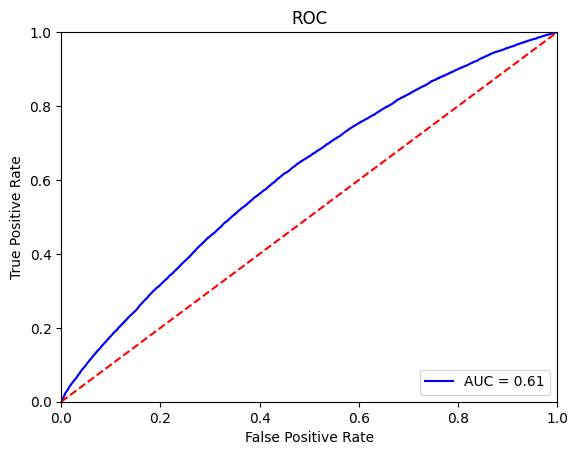

C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_512\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

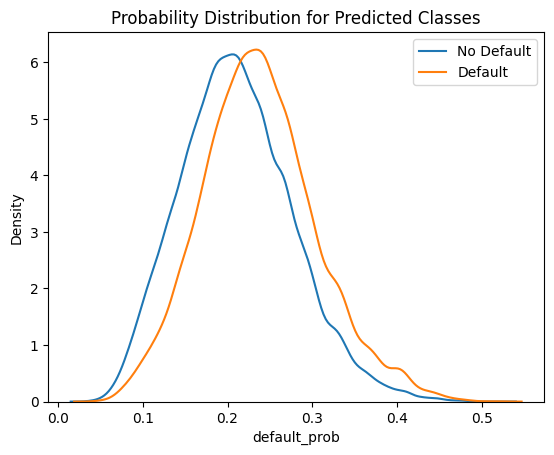

true_class  predicted_class
0           0                  0.613877
            1                  0.386123
1           1                  0.555446
            0                  0.444554
Name: proportion, dtype: float64


In [118]:
#building the model again

rf = RandomForestClassifier(n_estimators=100, max_depth=15)

rf.fit(X_train_bal, y_train_bal)
eval_model(rf, X_test, y_test)

### Not very great performance as some of the defaults are not been predicted well. 

We will use smote algorithm to generate synthetic data for balancing instead of duplicating values like previouslyy

In [67]:
from imblearn.combine import SMOTETomek

In [68]:
smote = SMOTETomek()

In [69]:
X_train_synth, y_train_synth = smote.fit_resample(X_train, y_train)

### 

Visualizing balance and training again

In [77]:

print(y_train_synth.value_counts(normalize=True))


LOAN_DEFAULT
0    0.5
1    0.5
Name: proportion, dtype: float64




Accuracy:  0.5896721065385687
Precision:  0.2821416501713899
Recall:  0.5780987239093877
f1:  0.37920965544091884
AUC:  0.6129633580956242


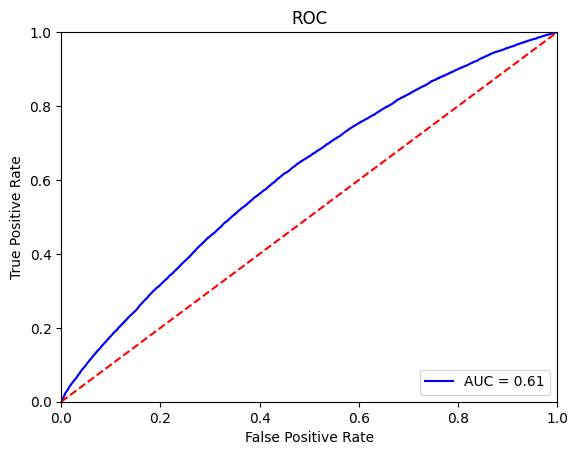

C:\Users\J.C\AppData\Local\Temp\ipykernel_3020\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_3020\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

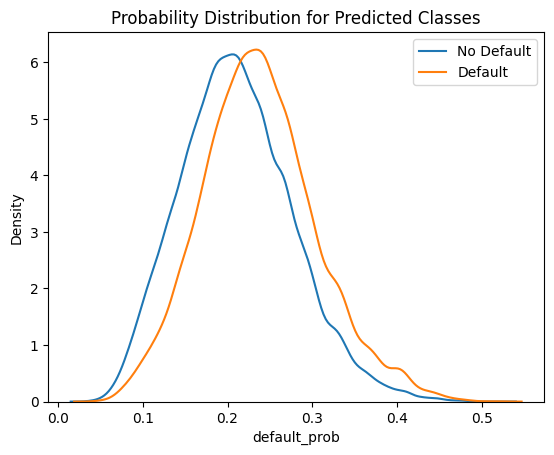

true_class  predicted_class
0           0                  0.592876
            1                  0.407124
1           1                  0.578099
            0                  0.421901
Name: proportion, dtype: float64


In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=15)

rf.fit(X_train_synth, y_train_synth)
eval_model(rf, X_test, y_test)

### Trainin xgboost

In [101]:
from xgboost import XGBClassifier



Accuracy:  0.5940576011666059
Precision:  0.28072094468614045
Recall:  0.5585122168364823
f1:  0.3736412818688682
AUC:  0.6129633580956242


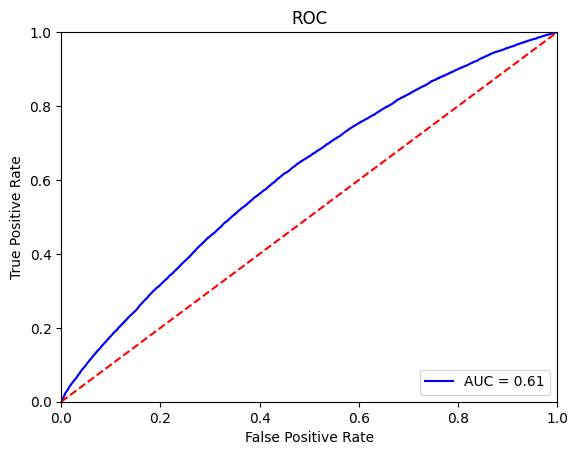

C:\Users\J.C\AppData\Local\Temp\ipykernel_3020\1776264388.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df_results[df_results['true_class'] == 0]['default_prob'], label='No Default', hist=False)
C:\Users\J.C\AppData\Local\Temp\ipykernel_3020\1776264388.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

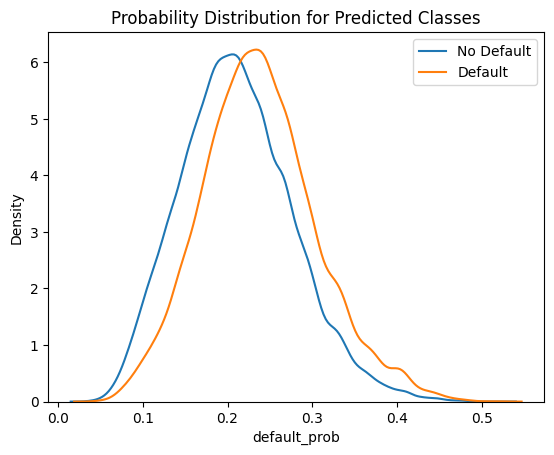

true_class  predicted_class
0           0                  0.603896
            1                  0.396104
1           1                  0.558512
            0                  0.441488
Name: proportion, dtype: float64


In [102]:
xgb = XGBClassifier()

xgb.fit(X_train_synth, y_train_synth)
eval_model(xgb, X_test, y_test)

In [103]:
xgb.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [106]:
predictions = xgb.predict(X_test)

eval_df = pd.DataFrame(columns=['ACTUAL', 'PREDICTIONS'])

eval_df['ACTUAL'] = y_test
eval_df['PREDICTIONS'] = predictions

eval_df

,ACTUAL,PREDICTIONS
UNIQUEID,,
617183,1,1
515702,0,0
466872,0,1
632384,0,0
461426,0,1
...,...,...
501576,0,0
540407,1,0
498554,0,1
